In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import nose.tools


In [3]:
plt.style.use('seaborn')

# Data Visualization and Exploratory Data Analysis Lab
## Visualizing and exploring data. Data mining process as a whole

### Problem 1. Read the dataset (1 point)
You'll be exploring data about people's income. Your task is to understand whether there are significant differences in the lifestyle of lower- vs. higher-income groups.

Read the dataset located [here](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data). The information file is [here](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). Save it into the variable `income_data`. Change the column names to what you like. The last column is related to the income class.

Get acquainted with the information file well before starting work.

You don't need to clean the dataset.

In [4]:
income_data = pd.read_csv('adult.data', header=None)

In [5]:
income_data.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
                      'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income_class']

In [6]:
income_data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
nose.tools.assert_is_not_none(income_data)

### Problem 2. High income (1 point)
How many people have high income (over 50 000 USD per year)? Write a function to return the value. The function should accept the dataframe as a parameter. Work with that parameter.

In [8]:
income_data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income_class      object
dtype: object

In [9]:
def get_num_people_with_high_income(dataframe):
    filtered_data = dataframe[dataframe.income_class == ' >50K']
    people_with_high_income = filtered_data.income_class.count()
    return people_with_high_income


In [10]:
get_num_people_with_high_income(income_data)

7841

In [11]:
# This cell contains hidden tests

### Problem 3. Capital gain: thresholding (1 point)
Plot a histogram of the capital gain. You can see that there are many people with relatively low gains and a few people - with very high gains.

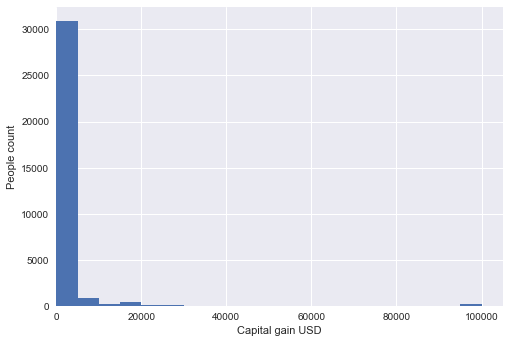

In [12]:
plt.hist(income_data['capital_gain'], bins=20)

plt.xlabel('Capital gain USD') 
plt.ylabel('People count')

plt.xlim(0)

plt.show()

Write a function which accepts a dataframe and a capital gain value (in USD) and returns how many people are there with **greater than or equal to** that threshold gain.

In [13]:
def get_num_people_with_higher_gain(dataframe, threshold_gain):
    filtred_data = dataframe[dataframe.capital_gain >= threshold_gain]
    people_with_higher_gain = filtred_data.capital_gain.count()
    return people_with_higher_gain

In [14]:
nose.tools.assert_equal(get_num_people_with_higher_gain(income_data, 60000), 159)

Create a pie chart of the number of people by marital status.

In [15]:
income_data.marital_status.unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [16]:
marital_status_groups = income_data.groupby('marital_status')
marital_status_groups

In [17]:
people_in_marital_status_groups = [len(value) for key,value in marital_status_groups]
people_in_marital_status_groups

[4443, 23, 14976, 418, 10683, 1025, 993]

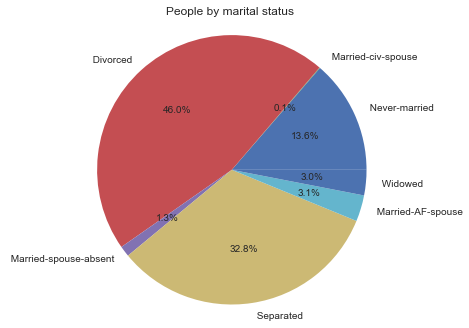

In [18]:
labels = income_data.marital_status.unique()
sizes = people_in_marital_status_groups
plt.title('People by marital status')
plt.pie(sizes,labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

### Problem 4. Marital status (2 points)
Which type of marital status is the most prominent (i.e. has the most people)? How many are there? Write a function that **calculates and returns the two answers**. 

In [19]:
def most_prominent_marital_status(dataframe):
    status = ""
    num_people = 0
    all_statuses = list(dataframe['marital_status'].unique())
    all_values = [len(value) for key,value in marital_status_groups]
    for i in range(0, len(all_statuses)):
        key = all_statuses[i]
        value = all_values[i]
        if value > num_people:
            num_people = value
            status = key
    
    return (status, num_people)

In [20]:
most_prominent_marital_status(income_data)

(' Divorced', 14976)

In [21]:
(status, num_people) = most_prominent_marital_status(income_data)
nose.tools.assert_not_equal(status, "")
nose.tools.assert_greater(num_people, 10000)

### Problem 5. Age groups (1 point)
Create a histogram of all people's ages. Use the default settings. Add the label "Age" on the x-axis and "Count" on the y-axis.

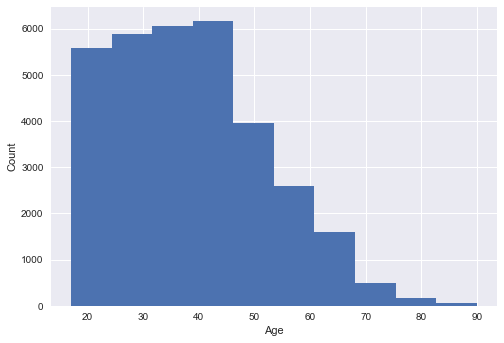

In [22]:
plt.hist(income_data['age'])

plt.xlabel('Age') 
plt.ylabel('Count')

plt.show()

Let's get another view of the data. Split the ages into three:
1. Young people: $\text{age} \le 30$
2. Middle-aged people: $30 < \text{age} \le 60$
3. Old people: $60 < \text{age}$

Return the counts in the following function. Which age group has the most people? How many are there?

In [23]:
def get_num_people_by_age_category(dataframe):
    young, middle_aged, old = (0, 0, 0)
    young = dataframe[dataframe['age'] <= 30].age.count()
    middle_aged = dataframe[(dataframe['age']>30) & (dataframe['age'] <= 60)].age.count()
    old = dataframe[dataframe['age'] > 60].age.count()
    
    return young, middle_aged, old

In [24]:
young, middle_aged, old = get_num_people_by_age_category(income_data)
nose.tools.assert_greater(young, 0)
nose.tools.assert_greater(middle_aged, 0)
nose.tools.assert_greater(old, 0)

Now we can create a bar chart. Execute the code below to see it.

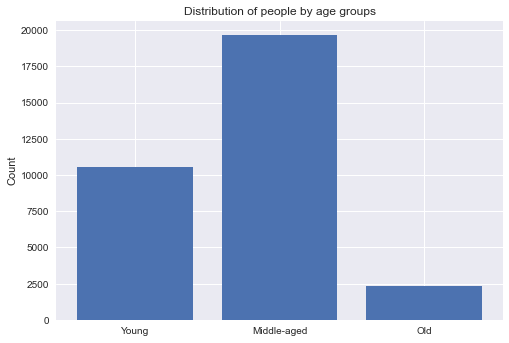

In [25]:
plt.title("Distribution of people by age groups")
plt.bar(range(3), [young, middle_aged, old])
plt.xticks(range(3), ["Young", "Middle-aged", "Old"])
plt.ylabel("Count")
plt.show()

### Problem 6. Native country (2 points)
Have a look at the native country of the people. The highest number of people are, as expected, from the US. What country makes for **the second highest** number of people? How many are they? Write a function to **calculate** and return the answer given a dataframe. DO NOT hardcode the answer, e.g. `return "Germany"`.

За да изведа нужната информация, групирам данните по държава и полученото го превръщам речник, от който след като го сортирам по ключ и стойност, изваждам данните на предпоследно място.

In [26]:
def get_second_highest_num_people(dataframe):
    num_people, country = 0, ""
    info = dict(income_data.groupby('native_country')['native_country'].size())
    sorted_info = sorted(info.items(), key=lambda x:x[1])
    num_people, country = reversed(sorted_info[-2])
    
    return num_people, country

In [27]:
get_second_highest_num_people(income_data)

(643, ' Mexico')

In [28]:
num_people, country = get_second_highest_num_people(income_data)
nose.tools.assert_greater(num_people, 0)
nose.tools.assert_not_equal(country, "")

### Problem 7. Busiest occupations (2 points)
Which people are most overworked? Group all data by occupation and calculate the mean hours per week for each group.

Write a function that **calculates and returns** all mean hours per week as a `Series`. Sort the results in descending order (most hours to fewest hours).

In [29]:
def get_mean_working_hours_by_income(dataframe):
    mean_hours = dataframe.groupby(['occupation']).hours_per_week.mean()
    sorted_mean_hours = mean_hours.sort_values(ascending=False)
    return sorted_mean_hours

In [30]:
get_mean_working_hours_by_income(income_data)

occupation
 Farming-fishing      46.989940
 Exec-managerial      44.987703
 Transport-moving     44.656230
 Protective-serv      42.870570
 Prof-specialty       42.386715
 Craft-repair         42.304221
 Sales                40.781096
 Machine-op-inspct    40.755744
 Armed-Forces         40.666667
 Tech-support         39.432112
 Handlers-cleaners    37.947445
 Adm-clerical         37.558355
 Other-service        34.701669
 Priv-house-serv      32.885906
 ?                    31.906131
Name: hours_per_week, dtype: float64

In [31]:
hours = get_mean_working_hours_by_income(income_data)
print(hours)
nose.tools.assert_almost_equal(hours["Handlers-cleaners"], 37.95, delta = 0.01)

occupation
 Farming-fishing      46.989940
 Exec-managerial      44.987703
 Transport-moving     44.656230
 Protective-serv      42.870570
 Prof-specialty       42.386715
 Craft-repair         42.304221
 Sales                40.781096
 Machine-op-inspct    40.755744
 Armed-Forces         40.666667
 Tech-support         39.432112
 Handlers-cleaners    37.947445
 Adm-clerical         37.558355
 Other-service        34.701669
 Priv-house-serv      32.885906
 ?                    31.906131
Name: hours_per_week, dtype: float64


KeyError: 'Handlers-cleaners'

Finally, let's plot a bar chart. Check the values carefully. If your do not match, feel free to edit the chart generation code below.

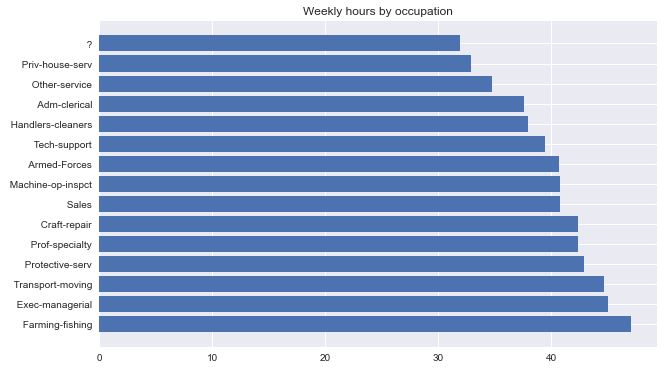

In [32]:
plt.figure(figsize = (10, 6))
plt.title("Weekly hours by occupation")
plt.barh(range(len(hours)), hours)
plt.yticks(list(range(len(hours))), hours.index)
plt.show()